In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


## Read Dataset 

In [22]:
data = pd.read_csv("laptopData.csv", encoding="utf-8")

data.head(6)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5.0,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000


## Drop the unnecessary Columns 

In [23]:
#print columns name
print (f"Total Number of Columns: {len(list(data.columns))}")
print (*data.columns, sep= '\n')

Total Number of Columns: 12
Unnamed: 0
Company
TypeName
Inches
ScreenResolution
Cpu
Ram
Memory
Gpu
OpSys
Weight
Price


In [24]:
#drop the unnamed column
data.drop("Unnamed: 0", axis=1, inplace=True)

print ("\n".join(data.columns))

Company
TypeName
Inches
ScreenResolution
Cpu
Ram
Memory
Gpu
OpSys
Weight
Price


## Get the information of the Dataset

In [25]:
# Get the information of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


### Summary of the Dataset 
* There is total 1303 entries
* There are total 11 columns 
* Dependent variable is the price of the column

## Check Nan and drop the Nan Values 

In [26]:
#check the null value
data.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [27]:
# Print the null rows
null_rows = data[data["Company"].isnull()]
print (null_rows.shape)

(30, 11)


In [28]:
#drop the rows that has null values
data.dropna(inplace= True)
data.shape

(1273, 11)

In [29]:
data.describe()

,Price
count,1273.000000
mean,59955.814073
std,37332.251005
min,9270.720000
25%,31914.720000
50%,52161.120000
75%,79333.387200
max,324954.720000


## Relationship between company name and price of the laptop

In [42]:
Companis = data["Company"].unique()
print (f"Number of company: {len(Companis)} \n {Companis}")

print ("==============================================")

print ("The relation between company name and Price: \n")
print(data.groupby("Company").mean("price"))


Number of company: 19 
 ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
The relation between company name and Price: 

                   Price
Company                 
Acer        33394.615969
Apple       83340.499886
Asus        58972.373723
Chuwi       16745.726400
Dell        63237.061079
Fujitsu     38574.720000
Google      89386.080000
HP          57214.371465
Huawei      75870.720000
LG         111834.720000
Lenovo      58072.477208
MSI         91814.548891
Mediacom    15717.600000
Microsoft   85903.788000
Razer      178282.491429
Samsung     75308.320000
Toshiba     66747.370213
Vero        11584.404000
Xiaomi      60390.882000


In [40]:
companies_relation = data.groupby("Company")["Price"].mean().sort_values()
companies_relation

Company
Vero          11584.404000
Mediacom      15717.600000
Chuwi         16745.726400
Acer          33394.615969
Fujitsu       38574.720000
HP            57214.371465
Lenovo        58072.477208
Asus          58972.373723
Xiaomi        60390.882000
Dell          63237.061079
Toshiba       66747.370213
Samsung       75308.320000
Huawei        75870.720000
Apple         83340.499886
Microsoft     85903.788000
Google        89386.080000
MSI           91814.548891
LG           111834.720000
Razer        178282.491429
Name: Price, dtype: float64

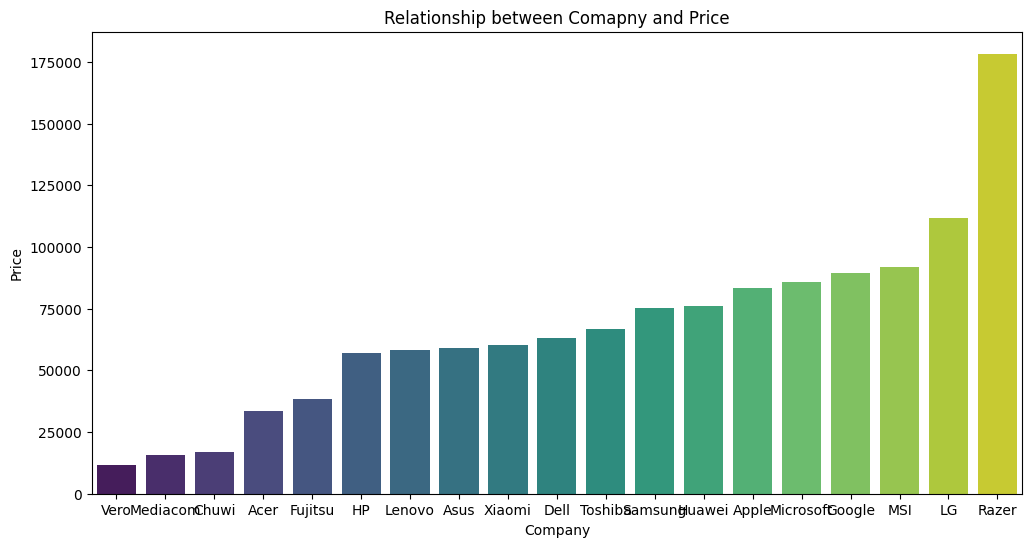

In [44]:

plt.figure(figsize=(12,6))
sns.barplot(
    x=companies_relation.index,
    y=companies_relation.values,
    hue=companies_relation.index,  # Required for palette
    palette='viridis',
    dodge=False,  # Avoid grouped bars
    legend=False   # Hide legend if redundant
)
plt.xlabel("Company")
plt.ylabel("Price")
plt.title("Relationship between Comapny and Price")
plt.show()